In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts

# csv 파일 불러오기

In [ ]:
cooking = pd.read_csv("/content/drive/MyDrive/Projectdata/Cooking_data_set.csv")
error = pd.read_csv("/content/drive/MyDrive/Projectdata/Error_Message.csv")
product = pd.read_csv("/content/drive/MyDrive/Projectdata/Product_Name.csv")
booking = pd.read_csv("/content/drive/MyDrive/Projectdata/booking_data.csv")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 데이터 전처리

## NaN 제거
- 품목코드 3개 없는 것 삭제

In [ ]:
# NaN 제거
error_set = error.dropna()

## 발생시간, 종료시간, 오류조치시간

### 발생시간, 종료시간 datetime 형변환

In [ ]:
error_set['발생시간'] = pd.to_datetime(error_set['발생시간'], format='%H:%M')
error_set['종료시간'] = pd.to_datetime(error_set['종료시간'], format='%H:%M')

<ipython-input-4-7ac42a1cbcc5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_set['발생시간'] = pd.to_datetime(error_set['발생시간'], format='%H:%M')
<ipython-input-4-7ac42a1cbcc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_set['종료시간'] = pd.to_datetime(error_set['종료시간'], format='%H:%M')


In [ ]:
error_set.dtypes

순번                        int64
생산라인코드                   object
생산라인명                    object
생산일자                     object
발생시간             datetime64[ns]
종료시간             datetime64[ns]
오류조치시간                    int64
비가동코드                    object
Error_Message            object
품목코드                     object
품목명                      object
오류발생작업장명                 object
dtype: object

### 오류조치시간 재계산

In [ ]:
error_set_minus = error_set[pd.to_datetime(error_set['종료시간'], format='%H:%M') < pd.to_datetime(error_set['발생시간'], format='%H:%M')]
error_set_minus['종료시간'] = pd.to_datetime(error_set_minus['종료시간'], format='%H:%M') + datetime.timedelta(days=1)

<ipython-input-6-43ae4775c20a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_set_minus['종료시간'] = pd.to_datetime(error_set_minus['종료시간'], format='%H:%M') + datetime.timedelta(days=1)


In [ ]:
idx = error_set_minus.index

error_set.loc[idx,'종료시간'] = error_set_minus.loc[idx,'종료시간']

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
error_set['오류조치시간'] = (pd.to_datetime(error_set['종료시간']).astype(np.int64) - pd.to_datetime(error_set['발생시간']).astype(np.int64)) // 60000000000

<ipython-input-8-b96308915f3f>:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  error_set['오류조치시간'] = (pd.to_datetime(error_set['종료시간']).astype(np.int64) - pd.to_datetime(error_set['발생시간']).astype(np.int64)) // 60000000000
<ipython-input-8-b96308915f3f>:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  error_set['오류조치시간'] = (pd.to_datetime(error_set['종료시간']).astype(np.int64) - pd.to_datetime(error_set['발생시간']).astype(np.int64)) // 60000000000
<ipython-input-8-b96308915f3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_set['오류조치시간'] = (pd.

In [ ]:
error_set

순번 생산라인코드      생산라인명        생산일자                발생시간  \
0     10   D004       PET병  2011-01-03 1900-01-01 14:16:00   
1      7   D011    2동 오리히로  2011-01-04 1900-01-01 18:54:00   
2      2   C002      쿠커 #2  2011-01-05 1900-01-01 09:51:00   
3     13   P004      PET#1  2011-01-05 1900-01-01 18:20:00   
4     17   C004      쿠커 #4  2011-01-10 1900-01-01 22:32:00   
...   ..    ...        ...         ...                 ...   
1068   2  D0036     로타리 #5  2021-10-22 1900-01-01 12:30:00   
1069   3   D084   2동 로타리#4  2021-10-25 1900-01-01 09:46:00   
1070   1   C045      쿠커 #5  2021-10-25 1900-01-01 08:58:00   
1072   1   D005      3.2마요  2021-10-28 1900-01-01 10:50:00   
1073   7   D087  냉동밥 내포장#2  2021-10-28 1900-01-01 14:15:00   

                    종료시간  오류조치시간    비가동코드 Error_Message      품목코드  \
0    1900-01-01 14:24:00       8  W0056B4          위치조정  13D02080   
1    1900-01-01 19:03:00       9  W005711            대기  16A01016   
2    1900-01-01 09:58:00       7  W003452            충전  23K01321   
3    1900-01-01 20:44:00     144  W0076B2           구동부  13R02051   
4    1900-01-02 01:16:00     164  W003721        충진 미종료  23D02080   
...                  ...     ...      ...           ...       ...   
1068 1900-01-01 18:34:00     364  W005712            고장  16B06061   
1069 1900-01-01 11:49:00     123  W005713            수리  13A00725   
1070 1900-01-01 09:04:00       6  W003446         ph 이상  23U02003   
1072 1900-01-01 11:06:00      16  W0058Z9            기타  16B06099   
1073 1900-01-01 14:35:00      20  W005722            공정  1BA03638   

                                          품목명 오류발생작업장명  
0                                    참깨흑임자드레싱      충전실  
1                                 시아스고구마샐러드믹스      충전실  
2                                  나가사키베이스(재)      쿠킹실  
3                                 이마트베스트돈까스소스      포장실  
4                                 참깨흑임자드레싱(재)      쿠킹실  
...                                       ...      ...  
1068                            천년풍미퓨어마요네즈1kg      충전실  
1069                                  샘표강된장양념      충전실  
1070                       유기아가베시럽665g/올가홀(재)      쿠킹실  
1072                           맛있는골드마요네즈3.2kg      충전실  
1073  (1)Homeplus signature 날치알이톡톡터지는날치알밥(알밥)      충전실  

[1071 rows x 12 columns]

## cooking과 error 합치기

In [ ]:
cooking

순번 생산라인코드      생산라인명        생산일자      품목코드              품목명 작업장코드  \
0       3   C001      쿠커 #1  2011-01-03  23K01312       서비스면양념장(재)  W003   
1       1   C002      쿠커 #2  2011-01-03  23V00019   고구마샐러드믹스베이스(재)  W003   
2      13   C003      쿠커 #3  2011-01-03  1.#JE+00    이마트가쓰오다시국물(재)  W003   
3       7   C005   2동 쿠커 #4  2011-01-03  26A01006   고구마샐러드바145g(재)  W003   
4       2   C007     프리머 #1  2011-01-03  26B06024  이츠웰골드마요네즈1kg(재)  W003   
...    ..    ...        ...         ...       ...              ...   ...   
24064   1   D088  냉동밥 내포장#1  2021-10-29  1BA03713              NaN  W005   
24065   2   D088  냉동밥 내포장#1  2021-10-29  1BA03713              NaN  W005   
24066   3   D088  냉동밥 내포장#1  2021-10-29  1BA03713              NaN  W005   
24067   4   D088  냉동밥 내포장#1  2021-10-29  1BA03606         콩콩푸드밥3kg  W005   
24068   5   P003  파우치포장(#3)  2021-10-29  16B06118    주니어쿱마요네즈(1kg)  W007   

           충전실온도        실링온도        쿠킹온도  쿠킹스팀압력     실링압력   생산시간  
0      71.669853   96.769853  131.742003  23.315  201.844  70.37  
1      70.386480  102.086480  136.926080  23.226  212.043  70.83  
2      71.206130  112.306130  147.579680  23.516  208.781  73.55  
3      70.430565   96.030565  131.569165  23.692  208.269  74.81  
4      72.179319  114.079318  149.928068  23.899  211.625  73.40  
...          ...         ...         ...     ...      ...    ...  
24064  72.136538  117.336538  152.813288  23.651  203.823  71.54  
24065  71.874219  106.174219  141.470619  23.531  207.574  76.03  
24066  72.942705  119.742705  155.733955  23.994  210.006  74.50  
24067  70.664452   65.764452  100.773102  23.339  209.513  72.12  
24068  71.015225  106.115225  141.148725  23.356  205.288  76.03  

[24069 rows x 13 columns]

In [ ]:
# 생산시간이 없는 row만 가져온다.
cooking_notime = cooking[cooking['생산시간'].isnull()]
# cooking_notime['생산시간'] = cooking_notime['생산시간'].fillna(0)

# 생산시간 column 삭제 시도
cooking_notime = cooking_notime.drop(['생산시간'], axis=1)

In [ ]:
cooking_notime

순번 생산라인코드      생산라인명        생산일자      품목코드  \
10     10   D004       PET병  2011-01-03  13D02080   
43      7   D011    2동 오리히로  2011-01-04  16A01016   
47      2   C002      쿠커 #2  2011-01-05  23K01321   
71     13   P004      PET#1  2011-01-05  13R02051   
125    17   C004      쿠커 #4  2011-01-10  23D02080   
...    ..    ...        ...         ...       ...   
24030   3   D084   2동 로타리#4  2021-10-25  13A00725   
24032   1   C045      쿠커 #5  2021-10-25  23U02003   
24049   7   D088  냉동밥 내포장#1  2021-10-28  1BA03709   
24056   1   D005      3.2마요  2021-10-28  16B06099   
24060   7   D087  냉동밥 내포장#2  2021-10-28  1BA03638   

                                           품목명 작업장코드      충전실온도        실링온도  \
10                                    참깨흑임자드레싱  W005  71.125831   93.425831   
43                                 시아스고구마샐러드믹스  W005  71.587470  103.987470   
47                                  나가사키베이스(재)  W003  70.540995  102.440995   
71                                 이마트베스트돈까스소스  W007  71.401189  111.901189   
125                                참깨흑임자드레싱(재)  W003  70.649333  105.149333   
...                                        ...   ...        ...         ...   
24030                                  샘표강된장양념  W005  71.671267  112.571266   
24032                       유기아가베시럽665g/올가홀(재)  W003  69.827929   86.927929   
24049                                      NaN  W005  72.585609   93.885609   
24056                           맛있는골드마요네즈3.2kg  W005  71.764168  108.664168   
24060  (1)Homeplus signature 날치알이톡톡터지는날치알밥(알밥)  W005  70.610616  103.710616   

             쿠킹온도  쿠킹스팀압력     실링압력  
10     127.878281  22.968  201.430  
43     138.736120  23.166  204.974  
47     137.135195  23.129  204.249  
71     146.585739  23.123  200.068  
125    139.680183  23.021  200.541  
...           ...     ...      ...  
24030  147.339967  23.179  211.102  
24032  121.388229  22.974  200.317  
24049  128.549109  23.109  204.160  
24056  142.862968  22.799  201.039  
24060  138.257466  23.031  199.343  

[1074 rows x 12 columns]

In [ ]:
cooking_notime = cooking_notime.dropna()

In [ ]:
cooking_notime

순번 생산라인코드      생산라인명        생산일자      품목코드  \
10     10   D004       PET병  2011-01-03  13D02080   
43      7   D011    2동 오리히로  2011-01-04  16A01016   
47      2   C002      쿠커 #2  2011-01-05  23K01321   
71     13   P004      PET#1  2011-01-05  13R02051   
125    17   C004      쿠커 #4  2011-01-10  23D02080   
...    ..    ...        ...         ...       ...   
24029   2  D0036     로타리 #5  2021-10-22  16B06061   
24030   3   D084   2동 로타리#4  2021-10-25  13A00725   
24032   1   C045      쿠커 #5  2021-10-25  23U02003   
24056   1   D005      3.2마요  2021-10-28  16B06099   
24060   7   D087  냉동밥 내포장#2  2021-10-28  1BA03638   

                                           품목명 작업장코드      충전실온도        실링온도  \
10                                    참깨흑임자드레싱  W005  71.125831   93.425831   
43                                 시아스고구마샐러드믹스  W005  71.587470  103.987470   
47                                  나가사키베이스(재)  W003  70.540995  102.440995   
71                                 이마트베스트돈까스소스  W007  71.401189  111.901189   
125                                참깨흑임자드레싱(재)  W003  70.649333  105.149333   
...                                        ...   ...        ...         ...   
24029                            천년풍미퓨어마요네즈1kg  W005  71.865935  105.165935   
24030                                  샘표강된장양념  W005  71.671267  112.571266   
24032                       유기아가베시럽665g/올가홀(재)  W003  69.827929   86.927929   
24056                           맛있는골드마요네즈3.2kg  W005  71.764168  108.664168   
24060  (1)Homeplus signature 날치알이톡톡터지는날치알밥(알밥)  W005  70.610616  103.710616   

             쿠킹온도  쿠킹스팀압력     실링압력  
10     127.878281  22.968  201.430  
43     138.736120  23.166  204.974  
47     137.135195  23.129  204.249  
71     146.585739  23.123  200.068  
125    139.680183  23.021  200.541  
...           ...     ...      ...  
24029  139.863435  23.132  202.605  
24030  147.339967  23.179  211.102  
24032  121.388229  22.974  200.317  
24056  142.862968  22.799  201.039  
24060  138.257466  23.031  199.343  

[1071 rows x 12 columns]

In [ ]:
error_cooking = error_set.merge(cooking_notime, left_on=['순번','생산라인코드','생산라인명','생산일자','품목코드','품목명'],
right_on=['순번','생산라인코드','생산라인명','생산일자','품목코드','품목명'])
error_cooking

순번 생산라인코드      생산라인명        생산일자                발생시간  \
0     10   D004       PET병  2011-01-03 1900-01-01 14:16:00   
1      7   D011    2동 오리히로  2011-01-04 1900-01-01 18:54:00   
2      2   C002      쿠커 #2  2011-01-05 1900-01-01 09:51:00   
3     13   P004      PET#1  2011-01-05 1900-01-01 18:20:00   
4     17   C004      쿠커 #4  2011-01-10 1900-01-01 22:32:00   
...   ..    ...        ...         ...                 ...   
1068   2  D0036     로타리 #5  2021-10-22 1900-01-01 12:30:00   
1069   3   D084   2동 로타리#4  2021-10-25 1900-01-01 09:46:00   
1070   1   C045      쿠커 #5  2021-10-25 1900-01-01 08:58:00   
1071   1   D005      3.2마요  2021-10-28 1900-01-01 10:50:00   
1072   7   D087  냉동밥 내포장#2  2021-10-28 1900-01-01 14:15:00   

                    종료시간  오류조치시간    비가동코드 Error_Message      품목코드  \
0    1900-01-01 14:24:00       8  W0056B4          위치조정  13D02080   
1    1900-01-01 19:03:00       9  W005711            대기  16A01016   
2    1900-01-01 09:58:00       7  W003452            충전  23K01321   
3    1900-01-01 20:44:00     144  W0076B2           구동부  13R02051   
4    1900-01-02 01:16:00     164  W003721        충진 미종료  23D02080   
...                  ...     ...      ...           ...       ...   
1068 1900-01-01 18:34:00     364  W005712            고장  16B06061   
1069 1900-01-01 11:49:00     123  W005713            수리  13A00725   
1070 1900-01-01 09:04:00       6  W003446         ph 이상  23U02003   
1071 1900-01-01 11:06:00      16  W0058Z9            기타  16B06099   
1072 1900-01-01 14:35:00      20  W005722            공정  1BA03638   

                                          품목명 오류발생작업장명 작업장코드      충전실온도  \
0                                    참깨흑임자드레싱      충전실  W005  71.125831   
1                                 시아스고구마샐러드믹스      충전실  W005  71.587470   
2                                  나가사키베이스(재)      쿠킹실  W003  70.540995   
3                                 이마트베스트돈까스소스      포장실  W007  71.401189   
4                                 참깨흑임자드레싱(재)      쿠킹실  W003  70.649333   
...                                       ...      ...   ...        ...   
1068                            천년풍미퓨어마요네즈1kg      충전실  W005  71.865935   
1069                                  샘표강된장양념      충전실  W005  71.671267   
1070                       유기아가베시럽665g/올가홀(재)      쿠킹실  W003  69.827929   
1071                           맛있는골드마요네즈3.2kg      충전실  W005  71.764168   
1072  (1)Homeplus signature 날치알이톡톡터지는날치알밥(알밥)      충전실  W005  70.610616   

            실링온도        쿠킹온도  쿠킹스팀압력     실링압력  
0      93.425831  127.878281  22.968  201.430  
1     103.987470  138.736120  23.166  204.974  
2     102.440995  137.135195  23.129  204.249  
3     111.901189  146.585739  23.123  200.068  
4     105.149333  139.680183  23.021  200.541  
...          ...         ...     ...      ...  
1068  105.165935  139.863435  23.132  202.605  
1069  112.571266  147.339967  23.179  211.102  
1070   86.927929  121.388229  22.974  200.317  
1071  108.664168  142.862968  22.799  201.039  
1072  103.710616  138.257466  23.031  199.343  

[1073 rows x 18 columns]

In [ ]:
error_cooking.isnull().sum()

순번               0
생산라인코드           0
생산라인명            0
생산일자             0
발생시간             0
종료시간             0
오류조치시간           0
비가동코드            0
Error_Message    0
품목코드             0
품목명              0
오류발생작업장명         0
작업장코드            0
충전실온도            0
실링온도             0
쿠킹온도             0
쿠킹스팀압력           0
실링압력             0
dtype: int64

In [ ]:
error_set.head()
#['순번','생산라인코드','생산라인명','생산일자','품목코드','품목명']

순번 생산라인코드    생산라인명        생산일자                발생시간                종료시간  \
0  10   D004     PET병  2011-01-03 1900-01-01 14:16:00 1900-01-01 14:24:00   
1   7   D011  2동 오리히로  2011-01-04 1900-01-01 18:54:00 1900-01-01 19:03:00   
2   2   C002    쿠커 #2  2011-01-05 1900-01-01 09:51:00 1900-01-01 09:58:00   
3  13   P004    PET#1  2011-01-05 1900-01-01 18:20:00 1900-01-01 20:44:00   
4  17   C004    쿠커 #4  2011-01-10 1900-01-01 22:32:00 1900-01-02 01:16:00   

   오류조치시간    비가동코드 Error_Message      품목코드          품목명 오류발생작업장명  
0       8  W0056B4          위치조정  13D02080     참깨흑임자드레싱      충전실  
1       9  W005711            대기  16A01016  시아스고구마샐러드믹스      충전실  
2       7  W003452            충전  23K01321   나가사키베이스(재)      쿠킹실  
3     144  W0076B2           구동부  13R02051  이마트베스트돈까스소스      포장실  
4     164  W003721        충진 미종료  23D02080  참깨흑임자드레싱(재)      쿠킹실

In [ ]:
cooking_notime.head()
# ['순번','생산라인코드','생산라인명','생산일자','품목코드','품목명']

순번 생산라인코드    생산라인명        생산일자      품목코드          품목명 작업장코드      충전실온도  \
10   10   D004     PET병  2011-01-03  13D02080     참깨흑임자드레싱  W005  71.125831   
43    7   D011  2동 오리히로  2011-01-04  16A01016  시아스고구마샐러드믹스  W005  71.587470   
47    2   C002    쿠커 #2  2011-01-05  23K01321   나가사키베이스(재)  W003  70.540995   
71   13   P004    PET#1  2011-01-05  13R02051  이마트베스트돈까스소스  W007  71.401189   
125  17   C004    쿠커 #4  2011-01-10  23D02080  참깨흑임자드레싱(재)  W003  70.649333   

           실링온도        쿠킹온도  쿠킹스팀압력     실링압력  
10    93.425831  127.878281  22.968  201.430  
43   103.987470  138.736120  23.166  204.974  
47   102.440995  137.135195  23.129  204.249  
71   111.901189  146.585739  23.123  200.068  
125  105.149333  139.680183  23.021  200.541

In [ ]:
error_cooking_simple = error_cooking.copy()

error_cooking_simple['충전실온도'] = round(error_cooking['충전실온도'])
error_cooking_simple['실링온도'] = round(error_cooking['실링온도'])
error_cooking_simple['쿠킹온도'] = round(error_cooking['쿠킹온도'])
error_cooking_simple['쿠킹스팀압력'] = round(error_cooking['쿠킹스팀압력'])
error_cooking_simple['실링압력'] = round(error_cooking['실링압력'])

error_cooking_simple

순번 생산라인코드      생산라인명        생산일자                발생시간  \
0     10   D004       PET병  2011-01-03 1900-01-01 14:16:00   
1      7   D011    2동 오리히로  2011-01-04 1900-01-01 18:54:00   
2      2   C002      쿠커 #2  2011-01-05 1900-01-01 09:51:00   
3     13   P004      PET#1  2011-01-05 1900-01-01 18:20:00   
4     17   C004      쿠커 #4  2011-01-10 1900-01-01 22:32:00   
...   ..    ...        ...         ...                 ...   
1068   2  D0036     로타리 #5  2021-10-22 1900-01-01 12:30:00   
1069   3   D084   2동 로타리#4  2021-10-25 1900-01-01 09:46:00   
1070   1   C045      쿠커 #5  2021-10-25 1900-01-01 08:58:00   
1071   1   D005      3.2마요  2021-10-28 1900-01-01 10:50:00   
1072   7   D087  냉동밥 내포장#2  2021-10-28 1900-01-01 14:15:00   

                    종료시간  오류조치시간    비가동코드 Error_Message      품목코드  \
0    1900-01-01 14:24:00       8  W0056B4          위치조정  13D02080   
1    1900-01-01 19:03:00       9  W005711            대기  16A01016   
2    1900-01-01 09:58:00       7  W003452            충전  23K01321   
3    1900-01-01 20:44:00     144  W0076B2           구동부  13R02051   
4    1900-01-02 01:16:00     164  W003721        충진 미종료  23D02080   
...                  ...     ...      ...           ...       ...   
1068 1900-01-01 18:34:00     364  W005712            고장  16B06061   
1069 1900-01-01 11:49:00     123  W005713            수리  13A00725   
1070 1900-01-01 09:04:00       6  W003446         ph 이상  23U02003   
1071 1900-01-01 11:06:00      16  W0058Z9            기타  16B06099   
1072 1900-01-01 14:35:00      20  W005722            공정  1BA03638   

                                          품목명 오류발생작업장명 작업장코드  충전실온도   실링온도  \
0                                    참깨흑임자드레싱      충전실  W005   71.0   93.0   
1                                 시아스고구마샐러드믹스      충전실  W005   72.0  104.0   
2                                  나가사키베이스(재)      쿠킹실  W003   71.0  102.0   
3                                 이마트베스트돈까스소스      포장실  W007   71.0  112.0   
4                                 참깨흑임자드레싱(재)      쿠킹실  W003   71.0  105.0   
...                                       ...      ...   ...    ...    ...   
1068                            천년풍미퓨어마요네즈1kg      충전실  W005   72.0  105.0   
1069                                  샘표강된장양념      충전실  W005   72.0  113.0   
1070                       유기아가베시럽665g/올가홀(재)      쿠킹실  W003   70.0   87.0   
1071                           맛있는골드마요네즈3.2kg      충전실  W005   72.0  109.0   
1072  (1)Homeplus signature 날치알이톡톡터지는날치알밥(알밥)      충전실  W005   71.0  104.0   

       쿠킹온도  쿠킹스팀압력   실링압력  
0     128.0    23.0  201.0  
1     139.0    23.0  205.0  
2     137.0    23.0  204.0  
3     147.0    23.0  200.0  
4     140.0    23.0  201.0  
...     ...     ...    ...  
1068  140.0    23.0  203.0  
1069  147.0    23.0  211.0  
1070  121.0    23.0  200.0  
1071  143.0    23.0  201.0  
1072  138.0    23.0  199.0  

[1073 rows x 18 columns]

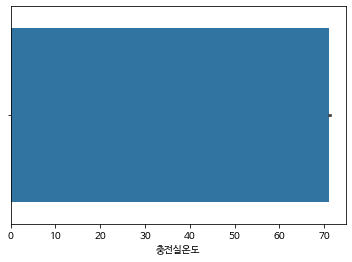

In [ ]:
sns.barplot(data=error_cooking_simple, x='충전실온도')

In [ ]:
error_cooking['충전실온도'].min()

68.672615378

In [ ]:
t_charge = error_cooking_simple.groupby('충전실온도',as_index=False).size()
t_shilling = error_cooking_simple.groupby('실링온도',as_index=False).size()
t_cooking = error_cooking_simple.groupby('쿠킹온도',as_index=False).size()
p_cooking = error_cooking_simple.groupby('쿠킹스팀압력',as_index=False).size()
p_shilling = error_cooking_simple.groupby('실링압력',as_index=False).size()
p_shilling

실링압력  size
0   192.0     1
1   193.0     2
2   194.0     5
3   195.0     9
4   196.0    18
5   197.0    40
6   198.0    40
7   199.0    95
8   200.0   102
9   201.0    98
10  202.0   121
11  203.0   131
12  204.0   120
13  205.0   100
14  206.0    73
15  207.0    59
16  208.0    29
17  209.0    16
18  210.0     9
19  211.0     4
20  212.0     1

In [ ]:
a = error_cooking_simple.groupby('충전실온도').count()
a

순번  생산라인코드  생산라인명  생산일자  발생시간  종료시간  오류조치시간  비가동코드  Error_Message  \
충전실온도                                                                       
69.0    78      78     78    78    78    78      78     78             78   
70.0   241     241    241   241   241   241     241    241            241   
71.0   346     346    346   346   346   346     346    346            346   
72.0   315     315    315   315   315   315     315    315            315   
73.0    76      76     76    76    76    76      76     76             76   
74.0    17      17     17    17    17    17      17     17             17   

       품목코드  품목명  오류발생작업장명  작업장코드  실링온도  쿠킹온도  쿠킹스팀압력  실링압력  
충전실온도                                                        
69.0     78   78        78     78    78    78      78    78  
70.0    241  241       241    241   241   241     241   241  
71.0    346  346       346    346   346   346     346   346  
72.0    315  315       315    315   315   315     315   315  
73.0     76   76        76     76    76    76      76    76  
74.0     17   17        17     17    17    17      17    17

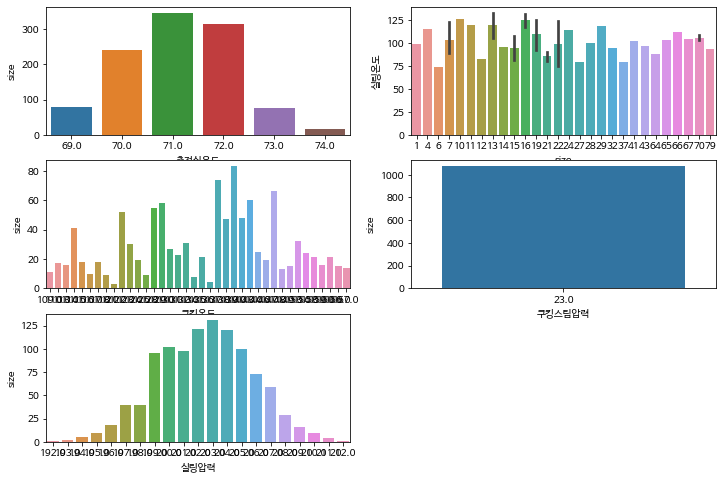

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(3,2,1)
sns.barplot(data=t_charge, x = '충전실온도', y='size')

plt.subplot(3,2,2)
sns.barplot(data=t_shilling, x = 'size', y='실링온도')

plt.subplot(3,2,3)
sns.barplot(data=t_cooking, x = '쿠킹온도', y='size')

plt.subplot(3,2,4)
sns.barplot(data=p_cooking, x = '쿠킹스팀압력', y='size')

plt.subplot(3,2,5)
sns.barplot(data=p_shilling, x = '실링압력', y='size')

plt.show()

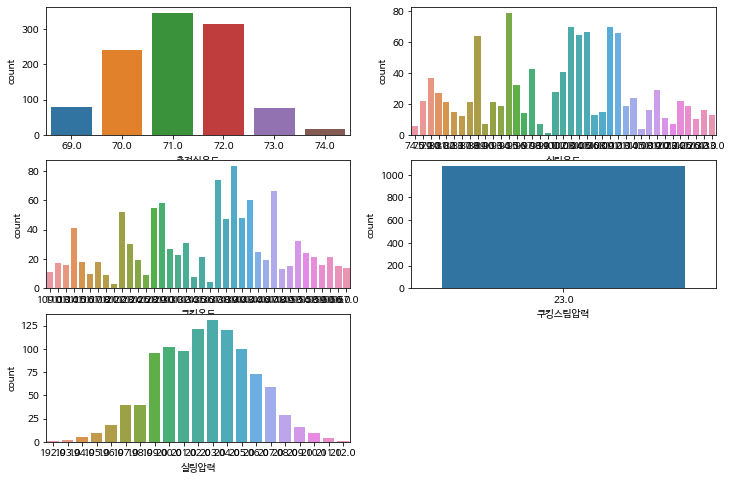

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(3,2,1)
sns.countplot(data=error_cooking_simple, x = '충전실온도')

plt.subplot(3,2,2)
sns.countplot(data=error_cooking_simple, x = '실링온도')

plt.subplot(3,2,3)
sns.countplot(data=error_cooking_simple, x = '쿠킹온도')

plt.subplot(3,2,4)
sns.countplot(data=error_cooking_simple, x = '쿠킹스팀압력')

plt.subplot(3,2,5)
sns.countplot(data=error_cooking_simple, x = '실링압력')

plt.show()

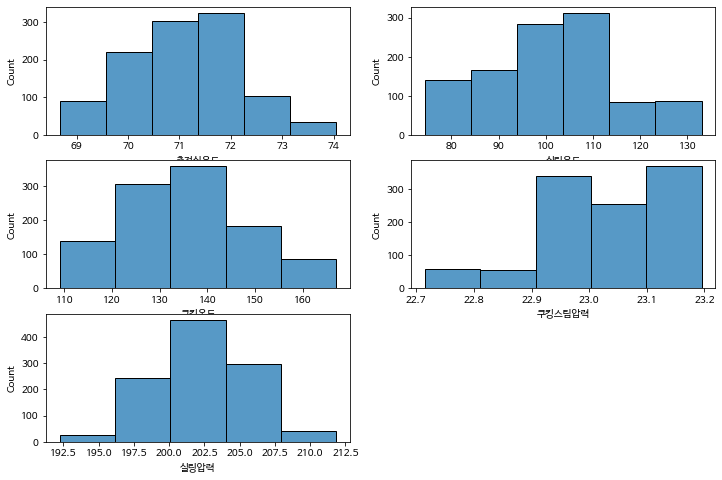

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(3,2,1)
sns.histplot(data=error_cooking, x = '충전실온도', bins=6)

plt.subplot(3,2,2)
sns.histplot(data=error_cooking, x = '실링온도', bins=6)

plt.subplot(3,2,3)
sns.histplot(data=error_cooking, x = '쿠킹온도', bins=5)

plt.subplot(3,2,4)
sns.histplot(data=error_cooking, x = '쿠킹스팀압력', bins=5)

plt.subplot(3,2,5)
sns.histplot(data=error_cooking, x = '실링압력', bins=5)


plt.show()

In [ ]:
t_charge = error_cooking_simple.groupby('충전실온도',as_index=False).size()
t_shilling = error_cooking_simple.groupby('실링온도',as_index=False).size()
t_cooking = error_cooking_simple.groupby('쿠킹온도',as_index=False).size()
p_cooking = error_cooking_simple.groupby('쿠킹스팀압력',as_index=False).size()
p_shilling = error_cooking_simple.groupby('실링압력',as_index=False).size()

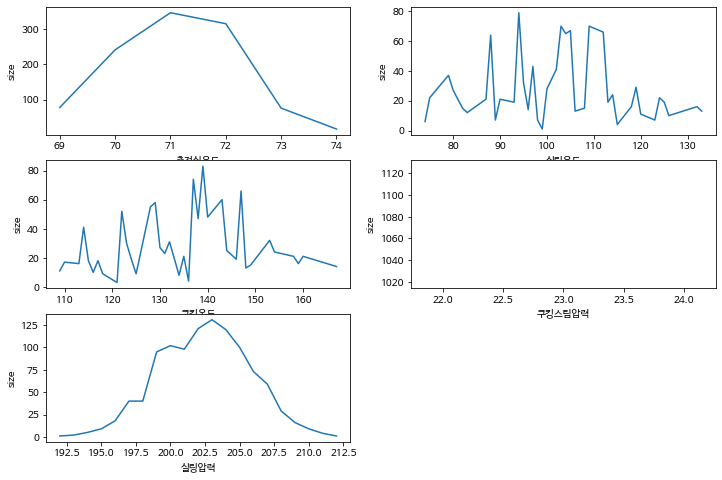

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(3,2,1)
sns.lineplot(data=t_charge, x = '충전실온도', y='size')

plt.subplot(3,2,2)
sns.lineplot(data=t_shilling, x = '실링온도', y='size')

plt.subplot(3,2,3)
sns.lineplot(data=t_cooking, x = '쿠킹온도', y='size')

plt.subplot(3,2,4)
sns.lineplot(data=p_cooking, x = '쿠킹스팀압력', y='size')

plt.subplot(3,2,5)
sns.lineplot(data=p_shilling, x = '실링압력', y='size')


plt.show()

In [ ]:
error_cooking_w005 = error_cooking[error_cooking['작업장코드'] == 'W005']
error_cooking_w005.head()

순번 생산라인코드    생산라인명        생산일자                발생시간                종료시간  \
0   10   D004     PET병  2011-01-03 1900-01-01 14:16:00 1900-01-01 14:24:00   
1    7   D011  2동 오리히로  2011-01-04 1900-01-01 18:54:00 1900-01-01 19:03:00   
7   21   D004     PET병  2011-01-11 1900-01-01 02:35:00 1900-01-01 02:42:00   
12   3   D003   로타리 #2  2011-01-12 1900-01-01 11:59:00 1900-01-01 13:39:00   
13   2   D005    3.2마요  2011-01-13 1900-01-01 09:47:00 1900-01-01 10:01:00   

    오류조치시간    비가동코드 Error_Message      품목코드          품목명 오류발생작업장명 작업장코드  \
0        8  W0056B4          위치조정  13D02080     참깨흑임자드레싱      충전실  W005   
1        9  W005711            대기  16A01016  시아스고구마샐러드믹스      충전실  W005   
7        7  W0056E1            노즐  13D02080     참깨흑임자드레싱      충전실  W005   
12     100  W005311          인쇄불량  16B06036   JFC마요네즈1kg      충전실  W005   
13      14  W0056E2            시밍  16B06050  신선하고깨끗한마요네즈      충전실  W005   

        충전실온도        실링온도        쿠킹온도  쿠킹스팀압력     실링압력  
0   71.125831   93.425831  127.878281  22.968  201.430  
1   71.587470  103.987470  138.736120  23.166  204.974  
7   69.821733  100.021733  134.814333  23.195  203.999  
12  69.993073   87.093073  121.553373  22.974  208.431  
13  73.031675   94.331675  128.995175  23.109  206.533

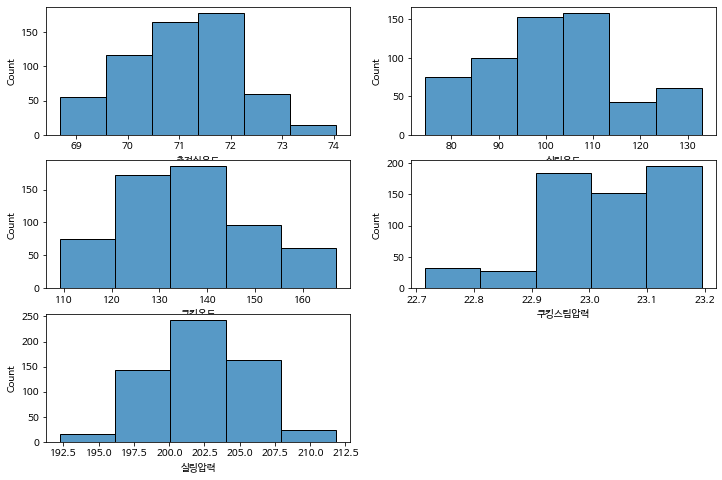

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(3,2,1)
sns.histplot(data=error_cooking_w005, x = '충전실온도', bins=6)

plt.subplot(3,2,2)
sns.histplot(data=error_cooking_w005, x = '실링온도', bins=6)

plt.subplot(3,2,3)
sns.histplot(data=error_cooking_w005, x = '쿠킹온도', bins=5)

plt.subplot(3,2,4)
sns.histplot(data=error_cooking_w005, x = '쿠킹스팀압력', bins=5)

plt.subplot(3,2,5)
sns.histplot(data=error_cooking_w005, x = '실링압력', bins=5)


plt.show()

In [ ]:
error_cooking[error_cooking['Error_Message'].str.contains('불량')]

순번 생산라인코드    생산라인명        생산일자                발생시간                종료시간  \
12    3   D003   로타리 #2  2011-01-12 1900-01-01 11:59:00 1900-01-01 13:39:00   
23    6   D011  2동 오리히로  2011-01-22 1900-01-01 22:20:00 1900-01-02 00:01:00   
34   25   D011  2동 오리히로  2011-01-28 1900-01-01 22:42:00 1900-01-01 22:55:00   
205  10   D002   로타리 #1  2012-03-07 1900-01-01 20:50:00 1900-01-01 21:15:00   
276   3   D006       튜브  2013-07-24 1900-01-01 11:20:00 1900-01-01 11:55:00   

     오류조치시간    비가동코드 Error_Message      품목코드                 품목명 오류발생작업장명  \
12      100  W005311          인쇄불량  16B06036          JFC마요네즈1kg      충전실   
23      101  W005313          불량교체  16A02010           시아스단호박샐러드      충전실   
34       13  W005313          불량교체  16A01002             감자샐러드-P      충전실   
205      25  W005317     필름(파우더불량)  13A00013           맘스양념소스2kg      충전실   
276      35  W005312          용기불량  13L00006  자연드림 상큼한 토마토케찹595g      충전실   

    작업장코드      충전실온도        실링온도        쿠킹온도  쿠킹스팀압력     실링압력  
12   W005  69.993073   87.093073  121.553373  22.974  208.431  
23   W005  71.790176  112.190176  146.565026  22.917  201.538  
34   W005  69.301906   87.601906  122.150356  23.032  199.155  
205  W005  69.862709  101.662709  136.300659  23.092  199.478  
276  W005  70.883728  111.783728  146.552428  23.179  202.361

In [ ]:
error_cooking.groupby('Error_Message')['충전실온도', '실링온도', '쿠킹온도', '쿠킹스팀압력', '실링압력'].mean()

<ipython-input-29-d821fc539661>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  error_cooking.groupby('Error_Message')['충전실온도', '실링온도', '쿠킹온도', '쿠킹스팀압력', '실링압력'].mean()


충전실온도        실링온도        쿠킹온도     쿠킹스팀압력        실링압력
Error_Message                                                          
6열컵실러          72.292434  112.692434  147.067284  22.917000  197.032000
Air (컴푸레샤)     72.278485  113.378485  147.746110  22.912000  200.283500
Brix 이상        72.258071   98.458071  132.991091  23.022000  201.649000
PSD패킹 교체       71.137144  124.837144  159.299744  22.975000  199.457000
QA 규격 확인 대기    71.151543  102.080710  136.676643  23.063958  202.246708
...                  ...         ...         ...        ...         ...
품목교체           71.610320   96.910320  131.365220  22.970000  195.942000
필름(파우더불량)      69.862709  101.662709  136.300659  23.092000  199.478000
헤드             71.216099  132.116099  166.187849  22.715000  195.946000
휴식             70.846774  102.971774  137.621224  23.099500  203.968000
히터             70.555183   88.155183  122.937983  23.189000  206.756000

[110 rows x 5 columns]

In [ ]:
error_cooking

순번 생산라인코드      생산라인명        생산일자                발생시간  \
0     10   D004       PET병  2011-01-03 1900-01-01 14:16:00   
1      7   D011    2동 오리히로  2011-01-04 1900-01-01 18:54:00   
2      2   C002      쿠커 #2  2011-01-05 1900-01-01 09:51:00   
3     13   P004      PET#1  2011-01-05 1900-01-01 18:20:00   
4     17   C004      쿠커 #4  2011-01-10 1900-01-01 22:32:00   
...   ..    ...        ...         ...                 ...   
1068   2  D0036     로타리 #5  2021-10-22 1900-01-01 12:30:00   
1069   3   D084   2동 로타리#4  2021-10-25 1900-01-01 09:46:00   
1070   1   C045      쿠커 #5  2021-10-25 1900-01-01 08:58:00   
1071   1   D005      3.2마요  2021-10-28 1900-01-01 10:50:00   
1072   7   D087  냉동밥 내포장#2  2021-10-28 1900-01-01 14:15:00   

                    종료시간  오류조치시간    비가동코드 Error_Message      품목코드  \
0    1900-01-01 14:24:00       8  W0056B4          위치조정  13D02080   
1    1900-01-01 19:03:00       9  W005711            대기  16A01016   
2    1900-01-01 09:58:00       7  W003452            충전  23K01321   
3    1900-01-01 20:44:00     144  W0076B2           구동부  13R02051   
4    1900-01-02 01:16:00     164  W003721        충진 미종료  23D02080   
...                  ...     ...      ...           ...       ...   
1068 1900-01-01 18:34:00     364  W005712            고장  16B06061   
1069 1900-01-01 11:49:00     123  W005713            수리  13A00725   
1070 1900-01-01 09:04:00       6  W003446         ph 이상  23U02003   
1071 1900-01-01 11:06:00      16  W0058Z9            기타  16B06099   
1072 1900-01-01 14:35:00      20  W005722            공정  1BA03638   

                                          품목명 오류발생작업장명 작업장코드      충전실온도  \
0                                    참깨흑임자드레싱      충전실  W005  71.125831   
1                                 시아스고구마샐러드믹스      충전실  W005  71.587470   
2                                  나가사키베이스(재)      쿠킹실  W003  70.540995   
3                                 이마트베스트돈까스소스      포장실  W007  71.401189   
4                                 참깨흑임자드레싱(재)      쿠킹실  W003  70.649333   
...                                       ...      ...   ...        ...   
1068                            천년풍미퓨어마요네즈1kg      충전실  W005  71.865935   
1069                                  샘표강된장양념      충전실  W005  71.671267   
1070                       유기아가베시럽665g/올가홀(재)      쿠킹실  W003  69.827929   
1071                           맛있는골드마요네즈3.2kg      충전실  W005  71.764168   
1072  (1)Homeplus signature 날치알이톡톡터지는날치알밥(알밥)      충전실  W005  70.610616   

            실링온도        쿠킹온도  쿠킹스팀압력     실링압력  
0      93.425831  127.878281  22.968  201.430  
1     103.987470  138.736120  23.166  204.974  
2     102.440995  137.135195  23.129  204.249  
3     111.901189  146.585739  23.123  200.068  
4     105.149333  139.680183  23.021  200.541  
...          ...         ...     ...      ...  
1068  105.165935  139.863435  23.132  202.605  
1069  112.571266  147.339967  23.179  211.102  
1070   86.927929  121.388229  22.974  200.317  
1071  108.664168  142.862968  22.799  201.039  
1072  103.710616  138.257466  23.031  199.343  

[1073 rows x 18 columns]

In [ ]:
cooking_sample= cooking.copy()

In [ ]:
cooking_sample = cooking_sample.drop(['생산시간'], axis=1)

In [ ]:
cooking_sample = cooking_sample.dropna()
cooking_sample

순번 생산라인코드      생산라인명        생산일자      품목코드  \
0       3   C001      쿠커 #1  2011-01-03  23K01312   
1       1   C002      쿠커 #2  2011-01-03  23V00019   
2      13   C003      쿠커 #3  2011-01-03  1.#JE+00   
3       7   C005   2동 쿠커 #4  2011-01-03  26A01006   
4       2   C007     프리머 #1  2011-01-03  26B06024   
...    ..    ...        ...         ...       ...   
24060   7   D087  냉동밥 내포장#2  2021-10-28  1BA03638   
24062   9   D088  냉동밥 내포장#1  2021-10-29  1BA03515   
24063  10   D088  냉동밥 내포장#1  2021-10-29  1BA03612   
24067   4   D088  냉동밥 내포장#1  2021-10-29  1BA03606   
24068   5   P003  파우치포장(#3)  2021-10-29  16B06118   

                                           품목명 작업장코드      충전실온도        실링온도  \
0                                   서비스면양념장(재)  W003  71.669853   96.769853   
1                               고구마샐러드믹스베이스(재)  W003  70.386480  102.086480   
2                                이마트가쓰오다시국물(재)  W003  71.206130  112.306130   
3                               고구마샐러드바145g(재)  W003  70.430565   96.030565   
4                              이츠웰골드마요네즈1kg(재)  W003  72.179319  114.079318   
...                                        ...   ...        ...         ...   
24060  (1)Homeplus signature 날치알이톡톡터지는날치알밥(알밥)  W005  70.610616  103.710616   
24062                             (쿠팡)곰곰갈비맛치킨밥  W005  69.732381   98.432381   
24063                           무명식당뿌리채소영양밥3kg  W005  71.459932  107.559932   
24067                                 콩콩푸드밥3kg  W005  70.664452   65.764452   
24068                            주니어쿱마요네즈(1kg)  W007  71.015225  106.115225   

             쿠킹온도  쿠킹스팀압력     실링압력  
0      131.742003  23.315  201.844  
1      136.926080  23.226  212.043  
2      147.579680  23.516  208.781  
3      131.569165  23.692  208.269  
4      149.928068  23.899  211.625  
...           ...     ...      ...  
24060  138.257466  23.031  199.343  
24062  133.916831  23.656  213.413  
24063  143.598182  24.026  215.243  
24067  100.773102  23.339  209.513  
24068  141.148725  23.356  205.288  

[23984 rows x 12 columns]

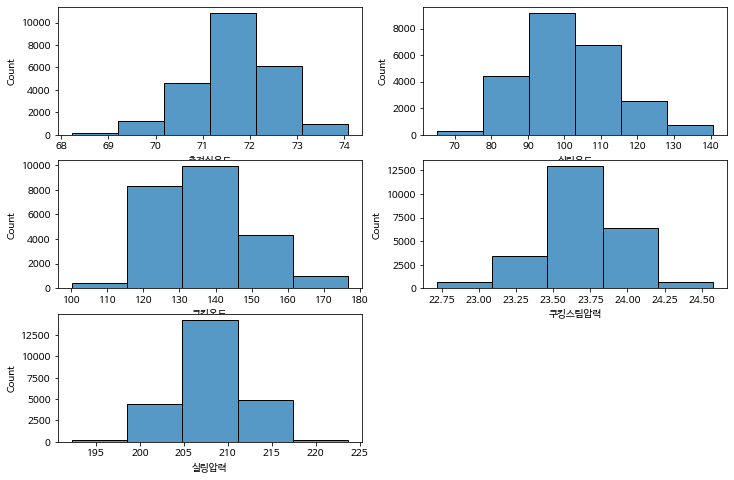

In [ ]:
## 전체데이터
plt.figure(figsize=(12,8))

plt.subplot(3,2,1)
sns.histplot(data=cooking_sample, x = '충전실온도', bins=6)

plt.subplot(3,2,2)
sns.histplot(data=cooking_sample, x = '실링온도', bins=6)

plt.subplot(3,2,3)
sns.histplot(data=cooking_sample, x = '쿠킹온도', bins=5)

plt.subplot(3,2,4)
sns.histplot(data=cooking_sample, x = '쿠킹스팀압력', bins=5)

plt.subplot(3,2,5)
sns.histplot(data=cooking_sample, x = '실링압력', bins=5)


plt.show()

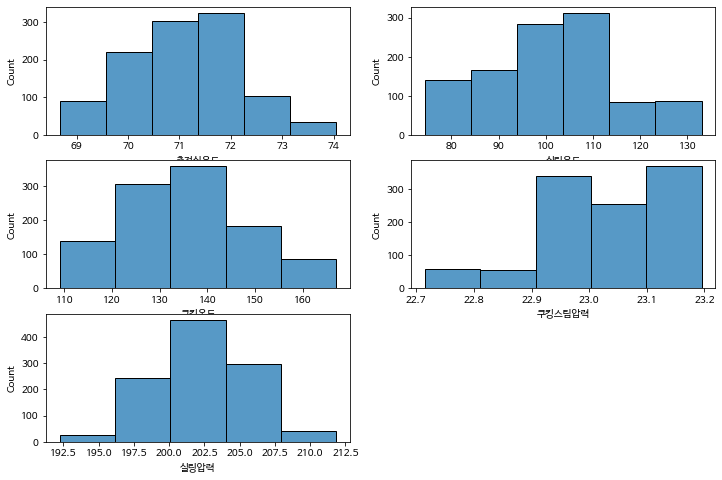

In [ ]:
## 오류 
plt.figure(figsize=(12,8))

plt.subplot(3,2,1)
sns.histplot(data=error_cooking, x = '충전실온도', bins=6)

plt.subplot(3,2,2)
sns.histplot(data=error_cooking, x = '실링온도', bins=6)

plt.subplot(3,2,3)
sns.histplot(data=error_cooking, x = '쿠킹온도', bins=5)

plt.subplot(3,2,4)
sns.histplot(data=error_cooking, x = '쿠킹스팀압력', bins=5)

plt.subplot(3,2,5)
sns.histplot(data=error_cooking, x = '실링압력', bins=5)


plt.show()

<ipython-input-36-ac18f93ac09f>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,5,1)
<ipython-input-36-ac18f93ac09f>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,5,2)
<ipython-input-36-ac18f93ac09f>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

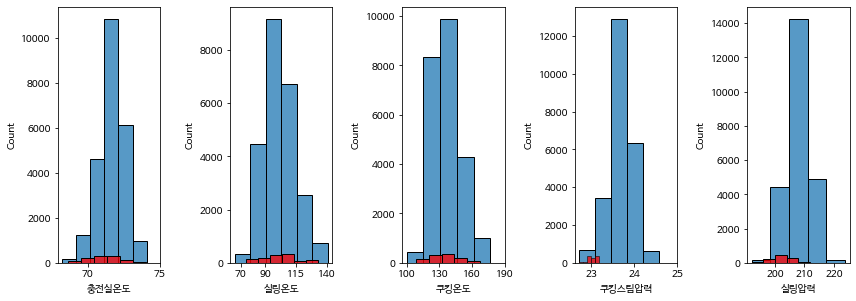

In [ ]:
## 전체데이터
plt.figure(figsize=(12,8))

plt.subplot(2,5,1)
sns.histplot(data=cooking_sample, x = '충전실온도', bins=6)

plt.subplot(2,5,2)
sns.histplot(data=cooking_sample, x = '실링온도', bins=6)

plt.subplot(2,5,3)
sns.histplot(data=cooking_sample, x = '쿠킹온도', bins=5)

plt.subplot(2,5,4)
sns.histplot(data=cooking_sample, x = '쿠킹스팀압력', bins=5)

plt.subplot(2,5,5)
sns.histplot(data=cooking_sample, x = '실링압력', bins=5)

## 오류 

plt.subplot(2,5,1)
sns.histplot(data=error_cooking, x = '충전실온도', bins=6, color='r')
plt.xticks([70, 75])

plt.subplot(2,5,2)
sns.histplot(data=error_cooking, x = '실링온도', bins=6, color='r')
plt.xticks([70, 90, 115, 140])

plt.subplot(2,5,3)
sns.histplot(data=error_cooking, x = '쿠킹온도', bins=5, color='r')
plt.xticks([100, 130, 160, 190])

plt.subplot(2,5,4)
sns.histplot(data=error_cooking, x = '쿠킹스팀압력', bins=5, color='r')
plt.xticks([23,24, 25])

plt.subplot(2,5,5)
sns.histplot(data=error_cooking, x = '실링압력', bins=5, color='r')
plt.xticks([200, 210, 220])

plt.tight_layout()
plt.show()

<ipython-input-72-ac7d1b30f356>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,5,1)
<ipython-input-72-ac7d1b30f356>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,5,2)
<ipython-input-72-ac7d1b30f356>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

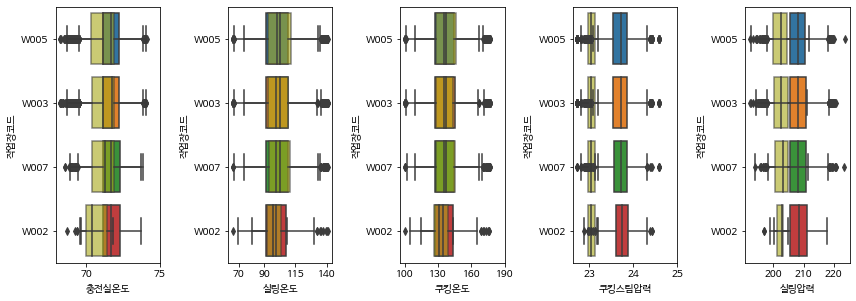

In [ ]:
## 전체데이터
plt.figure(figsize	=(12,8))
sns.color_palette()

plt.subplot(2,5,1)
sns.boxplot(data=cooking_sample, x = '충전실온도', y='작업장코드')

plt.subplot(2,5,2)
sns.boxplot(data=cooking_sample, x = '실링온도', y='작업장코드')

plt.subplot(2,5,3)
sns.boxplot(data=cooking_sample, x = '쿠킹온도', y='작업장코드')

plt.subplot(2,5,4)
sns.boxplot(data=cooking_sample, x = '쿠킹스팀압력', y='작업장코드')

plt.subplot(2,5,5)
sns.boxplot(data=cooking_sample, x = '실링압력', y='작업장코드')

## 오류 

plt.subplot(2,5,1)
sns.boxplot(data=error_cooking, x = '충전실온도', y='작업장코드', boxprops=dict(alpha=0.6), color='y')
plt.xticks([70, 75])

plt.subplot(2,5,2)
sns.boxplot(data=error_cooking, x = '실링온도', y='작업장코드', boxprops=dict(alpha=0.6), color='y')
plt.xticks([70, 90, 115, 140])

plt.subplot(2,5,3)
sns.boxplot(data=error_cooking, x = '쿠킹온도', y='작업장코드', boxprops=dict(alpha=0.6), color='y')
plt.xticks([100, 130, 160, 190])

plt.subplot(2,5,4)
sns.boxplot(data=error_cooking, x = '쿠킹스팀압력', y='작업장코드', boxprops=dict(alpha=0.6), color='y')
plt.xticks([23,24, 25])

plt.subplot(2,5,5)
sns.boxplot(data=error_cooking, x = '실링압력', y='작업장코드', boxprops=dict(alpha=0.6), color='y')
plt.xticks([200, 210, 220])

plt.tight_layout()

plt.show()

In [ ]:
## 전체데이터
plt.figure(figsize	=(12,8))
sns.color_palette()

plt.subplot(2,5,1)
sns.boxplot(data=cooking_sample, x = '충전실온도', y='작업장코드')

plt.subplot(2,5,2)
sns.boxplot(data=cooking_sample, x = '실링온도', y='작업장코드')

plt.subplot(2,5,3)
sns.boxplot(data=cooking_sample, x = '쿠킹온도', y='작업장코드')

plt.subplot(2,5,4)
sns.boxplot(data=cooking_sample, x = '쿠킹스팀압력', y='작업장코드')

plt.subplot(2,5,5)
sns.boxplot(data=cooking_sample, x = '실링압력', y='작업장코드')

## 오류 

plt.subplot(2,5,1)
sns.boxplot(data=error_cooking, x = '충전실온도', y='작업장코드', color='y')
plt.xticks([70, 75])

plt.subplot(2,5,2)
sns.boxplot(data=error_cooking, x = '실링온도', y='작업장코드', color='y')
plt.xticks([70, 90, 115, 140])

plt.subplot(2,5,3)
sns.boxplot(data=error_cooking, x = '쿠킹온도', y='작업장코드', color='y')
plt.xticks([100, 130, 160, 190])

plt.subplot(2,5,4)
sns.boxplot(data=error_cooking, x = '쿠킹스팀압력', y='작업장코드', color='y')
plt.xticks([23,24, 25])

plt.subplot(2,5,5)
sns.boxplot(data=error_cooking, x = '실링압력', y='작업장코드', color='y')
plt.xticks([200, 210, 220])

plt.tight_layout()

plt.show()

<ipython-input-74-23fa9e7034e2>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,5,1)
<ipython-input-74-23fa9e7034e2>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,5,2)
<ipython-input-74-23fa9e7034e2>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

In [ ]:
error_set.head()

순번 생산라인코드    생산라인명        생산일자                발생시간                종료시간  \
0  10   D004     PET병  2011-01-03 1900-01-01 14:16:00 1900-01-01 14:24:00   
1   7   D011  2동 오리히로  2011-01-04 1900-01-01 18:54:00 1900-01-01 19:03:00   
2   2   C002    쿠커 #2  2011-01-05 1900-01-01 09:51:00 1900-01-01 09:58:00   
3  13   P004    PET#1  2011-01-05 1900-01-01 18:20:00 1900-01-01 20:44:00   
4  17   C004    쿠커 #4  2011-01-10 1900-01-01 22:32:00 1900-01-02 01:16:00   

   오류조치시간    비가동코드 Error_Message      품목코드          품목명 오류발생작업장명  
0       8  W0056B4          위치조정  13D02080     참깨흑임자드레싱      충전실  
1       9  W005711            대기  16A01016  시아스고구마샐러드믹스      충전실  
2       7  W003452            충전  23K01321   나가사키베이스(재)      쿠킹실  
3     144  W0076B2           구동부  13R02051  이마트베스트돈까스소스      포장실  
4     164  W003721        충진 미종료  23D02080  참깨흑임자드레싱(재)      쿠킹실

In [ ]:
cooking_notime.head()

순번 생산라인코드    생산라인명        생산일자      품목코드          품목명 작업장코드      충전실온도  \
10   10   D004     PET병  2011-01-03  13D02080     참깨흑임자드레싱  W005  71.125831   
43    7   D011  2동 오리히로  2011-01-04  16A01016  시아스고구마샐러드믹스  W005  71.587470   
47    2   C002    쿠커 #2  2011-01-05  23K01321   나가사키베이스(재)  W003  70.540995   
71   13   P004    PET#1  2011-01-05  13R02051  이마트베스트돈까스소스  W007  71.401189   
125  17   C004    쿠커 #4  2011-01-10  23D02080  참깨흑임자드레싱(재)  W003  70.649333   

           실링온도        쿠킹온도  쿠킹스팀압력     실링압력  
10    93.425831  127.878281  22.968  201.430  
43   103.987470  138.736120  23.166  204.974  
47   102.440995  137.135195  23.129  204.249  
71   111.901189  146.585739  23.123  200.068  
125  105.149333  139.680183  23.021  200.541

In [ ]:
error_set['작업장코드'] = error_set['비가동코드'].apply(lambda x : x[:4])
error_set

<ipython-input-92-8b2fe2afb511>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  error_set['작업장코드'] = error_set['비가동코드'].apply(lambda x : x[:4])


순번 생산라인코드      생산라인명        생산일자                발생시간  \
0     10   D004       PET병  2011-01-03 1900-01-01 14:16:00   
1      7   D011    2동 오리히로  2011-01-04 1900-01-01 18:54:00   
2      2   C002      쿠커 #2  2011-01-05 1900-01-01 09:51:00   
3     13   P004      PET#1  2011-01-05 1900-01-01 18:20:00   
4     17   C004      쿠커 #4  2011-01-10 1900-01-01 22:32:00   
...   ..    ...        ...         ...                 ...   
1068   2  D0036     로타리 #5  2021-10-22 1900-01-01 12:30:00   
1069   3   D084   2동 로타리#4  2021-10-25 1900-01-01 09:46:00   
1070   1   C045      쿠커 #5  2021-10-25 1900-01-01 08:58:00   
1072   1   D005      3.2마요  2021-10-28 1900-01-01 10:50:00   
1073   7   D087  냉동밥 내포장#2  2021-10-28 1900-01-01 14:15:00   

                    종료시간  오류조치시간    비가동코드 Error_Message      품목코드  \
0    1900-01-01 14:24:00       8  W0056B4          위치조정  13D02080   
1    1900-01-01 19:03:00       9  W005711            대기  16A01016   
2    1900-01-01 09:58:00       7  W003452            충전  23K01321   
3    1900-01-01 20:44:00     144  W0076B2           구동부  13R02051   
4    1900-01-02 01:16:00     164  W003721        충진 미종료  23D02080   
...                  ...     ...      ...           ...       ...   
1068 1900-01-01 18:34:00     364  W005712            고장  16B06061   
1069 1900-01-01 11:49:00     123  W005713            수리  13A00725   
1070 1900-01-01 09:04:00       6  W003446         ph 이상  23U02003   
1072 1900-01-01 11:06:00      16  W0058Z9            기타  16B06099   
1073 1900-01-01 14:35:00      20  W005722            공정  1BA03638   

                                          품목명 오류발생작업장명 작업장코드  
0                                    참깨흑임자드레싱      충전실  W005  
1                                 시아스고구마샐러드믹스      충전실  W005  
2                                  나가사키베이스(재)      쿠킹실  W003  
3                                 이마트베스트돈까스소스      포장실  W007  
4                                 참깨흑임자드레싱(재)      쿠킹실  W003  
...                                       ...      ...   ...  
1068                            천년풍미퓨어마요네즈1kg      충전실  W005  
1069                                  샘표강된장양념      충전실  W005  
1070                       유기아가베시럽665g/올가홀(재)      쿠킹실  W003  
1072                           맛있는골드마요네즈3.2kg      충전실  W005  
1073  (1)Homeplus signature 날치알이톡톡터지는날치알밥(알밥)      충전실  W005  

[1071 rows x 13 columns]

error_cooking = error_set.merge(cooking_notime, left_on=['순번','생산라인코드','생산라인명','생산일자','품목코드','품목명'],
right_on=['순번','생산라인코드','생산라인명','생산일자','품목코드','품목명'])

In [ ]:
error_cooking2 = error_set.merge(cooking_notime, left_on=['순번','생산라인코드','생산라인명','생산일자','품목코드','품목명','작업장코드'], right_on=['순번','생산라인코드','생산라인명','생산일자','품목코드','품목명','작업장코드'])

In [ ]:
error_cooking2.groupby('작업장코드')['오류발생작업장명'].count()

작업장코드
W002     12
W003    369
W005    589
W007    103
Name: 오류발생작업장명, dtype: int64

In [ ]:
print(error_set.dtypes)
print('-------------------------------------------------')
print(cooking_notime.dtypes)
print('-------------------------------------------------')
print(error_cooking.dtypes)


순번                        int64
생산라인코드                   object
생산라인명                    object
생산일자                     object
발생시간             datetime64[ns]
종료시간             datetime64[ns]
오류조치시간                    int64
비가동코드                    object
Error_Message            object
품목코드                     object
품목명                      object
오류발생작업장명                 object
작업장코드                    object
dtype: object
-------------------------------------------------
순번          int64
생산라인코드     object
생산라인명      object
생산일자       object
품목코드       object
품목명        object
작업장코드      object
충전실온도     float64
실링온도      float64
쿠킹온도      float64
쿠킹스팀압력    float64
실링압력      float64
dtype: object
-------------------------------------------------
순번                        int64
생산라인코드                   object
생산라인명                    object
생산일자                     object
발생시간             datetime64[ns]
종료시간             datetime64[ns]
오류조치시간                    int64
비가동코드           

In [ ]:
error_cooking[error_cooking.duplicated(subset=None, keep='first')]

# 336,337,338이 공통 행이다. 그래서 336만 남기고 337,338을 지운다 
# 온도,압력이 달라서 공통 행이 생겼다. 그래서 지운다. (아마 사람이 잘못 입력한듯)

순번 생산라인코드       생산라인명        생산일자                발생시간  \
337   1   D007  2동 6열컵실러#1  2015-12-30 1900-01-01 07:10:00   
338   1   D007  2동 6열컵실러#1  2015-12-30 1900-01-01 07:10:00   

                   종료시간  오류조치시간    비가동코드 Error_Message      품목코드  \
337 1900-01-01 08:15:00      65  W005645           실린더  16A06005   
338 1900-01-01 08:15:00      65  W005645           실린더  16A06005   

                품목명 오류발생작업장명 작업장코드      충전실온도        실링온도        쿠킹온도  쿠킹스팀압력  \
337  씨제이두부샐러드고구마-세트      충전실  W005  72.771924  123.871924  158.418674  23.031   
338  씨제이두부샐러드고구마-세트      충전실  W005  69.310376   79.110376  113.533276  22.949   

        실링압력  
337  198.956  
338  203.543

In [ ]:
error_cooking.loc[336]

순번                                 1
생산라인코드                          D007
생산라인명                     2동 6열컵실러#1
생산일자                      2015-12-30
발생시간             1900-01-01 07:10:00
종료시간             1900-01-01 08:15:00
오류조치시간                            65
비가동코드                        W005645
Error_Message                    실린더
품목코드                        16A06005
품목명                   씨제이두부샐러드고구마-세트
오류발생작업장명                         충전실
작업장코드                           W005
충전실온도                      69.310376
실링온도                       79.110376
쿠킹온도                      113.533276
쿠킹스팀압력                        22.949
실링압력                         203.543
Name: 336, dtype: object

In [ ]:
error_cooking.loc[339,:]

순번                                 2
생산라인코드                          C007
생산라인명                         프리머 #1
생산일자                      2016-01-04
발생시간             1900-01-01 09:03:00
종료시간             1900-01-01 10:02:00
오류조치시간                            59
비가동코드                        W003553
Error_Message                  스팀 압력
품목코드                        26B06080
품목명                 골드마요네즈(업소용)-T(재)
오류발생작업장명                         쿠킹실
작업장코드                           W003
충전실온도                      69.264738
실링온도                       87.564738
쿠킹온도                      122.113188
쿠킹스팀압력                        23.032
실링압력                         204.635
Name: 339, dtype: object

In [ ]:
error_cooking = error_cooking.drop([337,338])

In [ ]:
error_cooking

순번 생산라인코드      생산라인명        생산일자                발생시간  \
0     10   D004       PET병  2011-01-03 1900-01-01 14:16:00   
1      7   D011    2동 오리히로  2011-01-04 1900-01-01 18:54:00   
2      2   C002      쿠커 #2  2011-01-05 1900-01-01 09:51:00   
3     13   P004      PET#1  2011-01-05 1900-01-01 18:20:00   
4     17   C004      쿠커 #4  2011-01-10 1900-01-01 22:32:00   
...   ..    ...        ...         ...                 ...   
1068   2  D0036     로타리 #5  2021-10-22 1900-01-01 12:30:00   
1069   3   D084   2동 로타리#4  2021-10-25 1900-01-01 09:46:00   
1070   1   C045      쿠커 #5  2021-10-25 1900-01-01 08:58:00   
1071   1   D005      3.2마요  2021-10-28 1900-01-01 10:50:00   
1072   7   D087  냉동밥 내포장#2  2021-10-28 1900-01-01 14:15:00   

                    종료시간  오류조치시간    비가동코드 Error_Message      품목코드  \
0    1900-01-01 14:24:00       8  W0056B4          위치조정  13D02080   
1    1900-01-01 19:03:00       9  W005711            대기  16A01016   
2    1900-01-01 09:58:00       7  W003452            충전  23K01321   
3    1900-01-01 20:44:00     144  W0076B2           구동부  13R02051   
4    1900-01-02 01:16:00     164  W003721        충진 미종료  23D02080   
...                  ...     ...      ...           ...       ...   
1068 1900-01-01 18:34:00     364  W005712            고장  16B06061   
1069 1900-01-01 11:49:00     123  W005713            수리  13A00725   
1070 1900-01-01 09:04:00       6  W003446         ph 이상  23U02003   
1071 1900-01-01 11:06:00      16  W0058Z9            기타  16B06099   
1072 1900-01-01 14:35:00      20  W005722            공정  1BA03638   

                                          품목명 오류발생작업장명 작업장코드      충전실온도  \
0                                    참깨흑임자드레싱      충전실  W005  71.125831   
1                                 시아스고구마샐러드믹스      충전실  W005  71.587470   
2                                  나가사키베이스(재)      쿠킹실  W003  70.540995   
3                                 이마트베스트돈까스소스      포장실  W007  71.401189   
4                                 참깨흑임자드레싱(재)      쿠킹실  W003  70.649333   
...                                       ...      ...   ...        ...   
1068                            천년풍미퓨어마요네즈1kg      충전실  W005  71.865935   
1069                                  샘표강된장양념      충전실  W005  71.671267   
1070                       유기아가베시럽665g/올가홀(재)      쿠킹실  W003  69.827929   
1071                           맛있는골드마요네즈3.2kg      충전실  W005  71.764168   
1072  (1)Homeplus signature 날치알이톡톡터지는날치알밥(알밥)      충전실  W005  70.610616   

            실링온도        쿠킹온도  쿠킹스팀압력     실링압력  
0      93.425831  127.878281  22.968  201.430  
1     103.987470  138.736120  23.166  204.974  
2     102.440995  137.135195  23.129  204.249  
3     111.901189  146.585739  23.123  200.068  
4     105.149333  139.680183  23.021  200.541  
...          ...         ...     ...      ...  
1068  105.165935  139.863435  23.132  202.605  
1069  112.571266  147.339967  23.179  211.102  
1070   86.927929  121.388229  22.974  200.317  
1071  108.664168  142.862968  22.799  201.039  
1072  103.710616  138.257466  23.031  199.343  

[1071 rows x 18 columns]

<ipython-input-121-23fa9e7034e2>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,5,1)
<ipython-input-121-23fa9e7034e2>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,5,2)
<ipython-input-121-23fa9e7034e2>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and

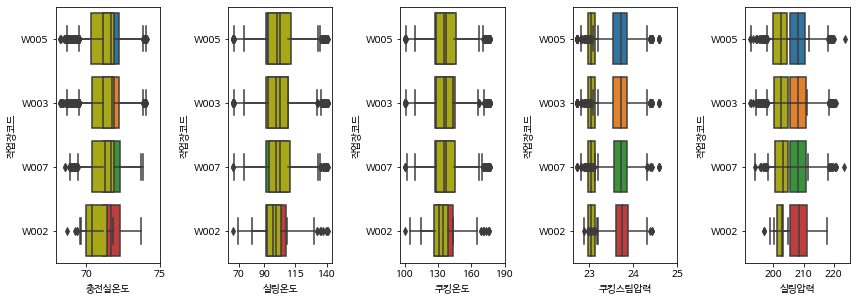

In [ ]:
## 전체데이터
plt.figure(figsize	=(12,8))
sns.color_palette()

plt.subplot(2,5,1)
sns.boxplot(data=cooking_sample, x = '충전실온도', y='작업장코드')

plt.subplot(2,5,2)
sns.boxplot(data=cooking_sample, x = '실링온도', y='작업장코드')

plt.subplot(2,5,3)
sns.boxplot(data=cooking_sample, x = '쿠킹온도', y='작업장코드')

plt.subplot(2,5,4)
sns.boxplot(data=cooking_sample, x = '쿠킹스팀압력', y='작업장코드')

plt.subplot(2,5,5)
sns.boxplot(data=cooking_sample, x = '실링압력', y='작업장코드')

## 오류 

plt.subplot(2,5,1)
sns.boxplot(data=error_cooking, x = '충전실온도', y='작업장코드', color='y')
plt.xticks([70, 75])

plt.subplot(2,5,2)
sns.boxplot(data=error_cooking, x = '실링온도', y='작업장코드', color='y')
plt.xticks([70, 90, 115, 140])

plt.subplot(2,5,3)
sns.boxplot(data=error_cooking, x = '쿠킹온도', y='작업장코드', color='y')
plt.xticks([100, 130, 160, 190])

plt.subplot(2,5,4)
sns.boxplot(data=error_cooking, x = '쿠킹스팀압력', y='작업장코드', color='y')
plt.xticks([23,24, 25])

plt.subplot(2,5,5)
sns.boxplot(data=error_cooking, x = '실링압력', y='작업장코드', color='y')
plt.xticks([200, 210, 220])

plt.tight_layout()

plt.show()